## EECS 4412 A Phase 3 Task 2

### PART 1: Exploratory Data Analysis

In [917]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist

%matplotlib inline

#file MUST be in same folder as this .ipynb file
student_data = pd.read_csv('216771875-216328387-215122856-T2Org.csv')
student_data.head()

,sex,age,address,traveltime,studytime,failures,romantic,freetime,goout,Dalc,Walc,absences,G1,G2,G3
0,F,18,U,2,2,0,no,3,4,1,1,6,5,6,6
1,F,17,U,1,2,0,no,3,3,1,1,4,5,5,6
2,F,15,U,1,2,3,no,3,2,2,3,10,7,8,10
3,F,15,U,1,3,0,yes,2,2,1,1,2,15,14,15
4,F,16,U,1,2,0,no,3,2,1,2,4,6,10,10


In [918]:
student_data.describe()

,age,traveltime,studytime,failures,freetime,goout,Dalc,Walc,absences,G1,G2,G3
count,50.000000,50.000000,50.00000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,15.540000,1.260000,1.94000,0.220000,3.28000,2.620000,1.260000,1.840000,4.480000,11.360000,11.940000,12.080000
std,0.705951,0.527218,0.71171,0.678835,1.03095,1.085902,0.694292,1.149268,5.357581,3.718459,3.593702,3.713406
min,15.000000,1.000000,1.00000,0.000000,1.00000,1.000000,1.000000,1.000000,0.000000,5.000000,5.000000,5.000000
25%,15.000000,1.000000,1.25000,0.000000,3.00000,2.000000,1.000000,1.000000,0.000000,8.000000,10.000000,10.000000
50%,15.000000,1.000000,2.00000,0.000000,3.00000,2.500000,1.000000,1.000000,2.000000,12.000000,12.000000,12.000000
75%,16.000000,1.000000,2.00000,0.000000,4.00000,3.000000,1.000000,2.000000,6.000000,14.000000,15.000000,15.000000
max,18.000000,3.000000,4.00000,3.000000,5.00000,5.000000,5.000000,5.000000,25.000000,19.000000,19.000000,20.000000


In [919]:
#--------------------------------------------------------------
# Following chunk of code is to convert certain pieces of data
# (such as famsize) to be numeric so it can be used in the
# KMeans algorithm
#--------------------------------------------------------------

#Dropping some unnecessary data
drop = ['sex', 'age', 'address', 'romantic']
student_data.drop(drop, axis=1, inplace=True)


#Changing G3 to be of the following scale
rating = []
for row in student_data['G3']:
    if (0 <= row < 10):  rating.append('0')
    elif (10 <= row < 15):  rating.append('1')
    elif (15 <= row <= 20):  rating.append('2')   
student_data['rating_G3'] = rating


#Dropping data which is now adjusted
drop = ['G3']
student_data.drop(drop, axis=1, inplace=True)

student_data.head()

,traveltime,studytime,failures,freetime,goout,Dalc,Walc,absences,G1,G2,rating_G3
0,2,2,0,3,4,1,1,6,5,6,0
1,1,2,0,3,3,1,1,4,5,5,0
2,1,2,3,3,2,2,3,10,7,8,1
3,1,3,0,2,2,1,1,2,15,14,2
4,1,2,0,3,2,1,2,4,6,10,1


### Notes:
Will now check for an attribute's relation to rating_G3, if there is no meaningful data that can be related to G3 or the attribute is not one from our intial questions it may be dropped.

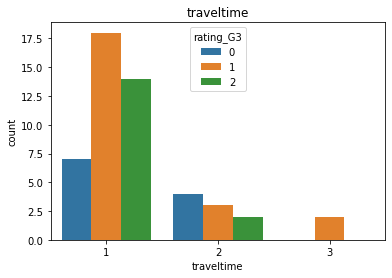

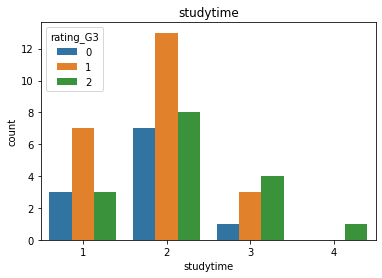

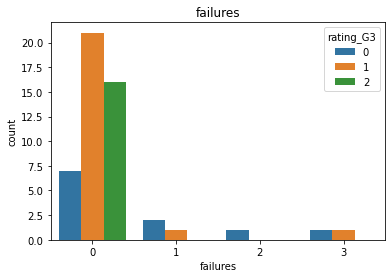

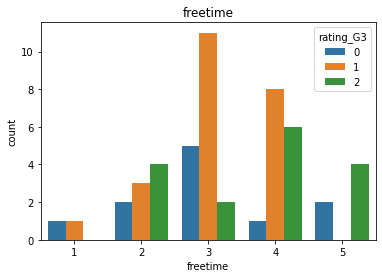

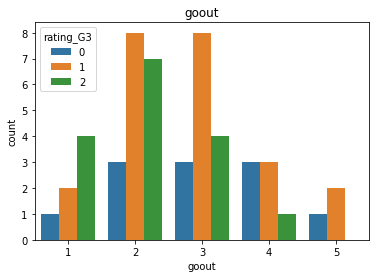

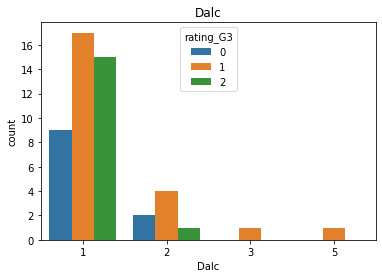

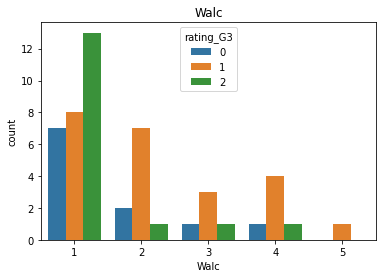

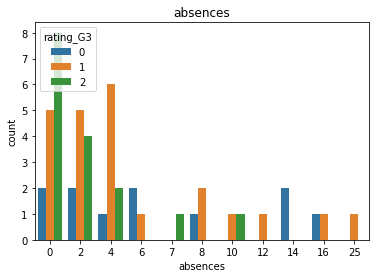

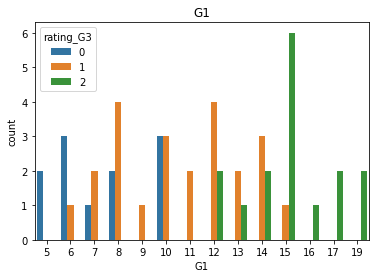

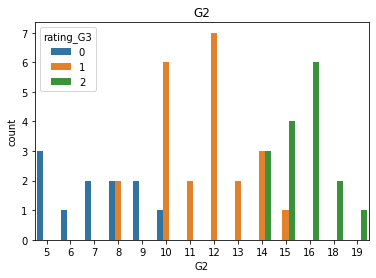

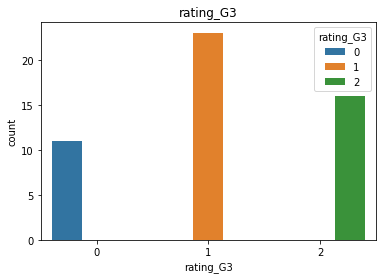

In [920]:
attri_names = student_data.columns

#Printing tables for each of the attributes, counting the number of different rating_G3 values that exist for a specfic
#value of said attribute
for i in attri_names:
    sns.countplot(x = i, hue = "rating_G3", data = student_data).set(title=str(i))
    plt.show()

In [921]:
#Storing rating_G3 data to be used for analysis later
student_target = student_data['rating_G3'].to_numpy()

#Dropping data deemed unncessary after EDA
drop = ['failures', 'G1', 'G2']
student_data.drop(drop, axis=1, inplace=True)

#=========================================================================================
#=========================================================================================
# Uncomment the following line for data table with 'rating_G3' still as an attribute
# and no normalization 
#
# student_data.to_csv('216771875-216328387-215122856-T2Mod_WITH-G3.csv')
#=========================================================================================
#=========================================================================================

drop = ['rating_G3']
student_data.drop(drop, axis=1, inplace=True)

#Using MinMaxScalar to perform normalization, where data is adjusted to be of range [0,1]
scale = preprocessing.MinMaxScaler()

tableTrnsfrm = scale.fit_transform(student_data)
student_data_norm = pd.DataFrame(tableTrnsfrm, columns=(student_data.columns))

student_data_norm.to_csv('216771875-216328387-215122856-T2Mod.csv')
student_data_norm.head()

,traveltime,studytime,freetime,goout,Dalc,Walc,absences
0,0.5,0.333333,0.50,0.75,0.00,0.00,0.24
1,0.0,0.333333,0.50,0.50,0.00,0.00,0.16
2,0.0,0.333333,0.50,0.25,0.25,0.50,0.40
3,0.0,0.666667,0.25,0.25,0.00,0.00,0.08
4,0.0,0.333333,0.50,0.25,0.00,0.25,0.16


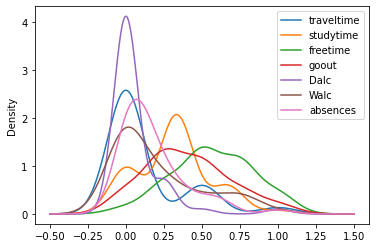

In [922]:
pd.DataFrame(student_data_norm).plot(kind='kde');

### PART 2: Performing KMeans Clustering

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

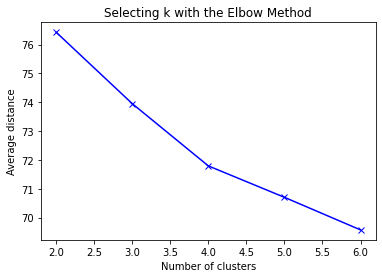

In [923]:
#Finding sum of squared error for each k from 2 to 6
clusters=range(2,7)
meandist=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(student_data_norm)
    clusassign=model.predict(student_data_norm)
    meandist.append(sum(np.min(cdist(student_data_norm, model.cluster_centers_, 'euclidean'), axis=1),student_data_norm.shape[0]))
    
#Display the data
plt.plot(clusters, meandist, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method')

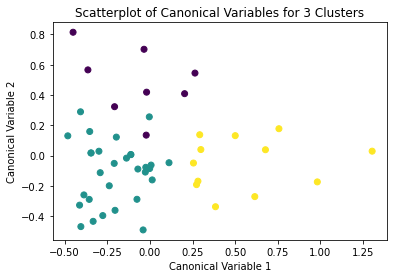

In [924]:
#Plotting the clusters for KMeans (3)

clusterNum = KMeans(n_clusters = 3)
clusterNum.fit(student_data_norm)
pred = clusterNum.predict(student_data_norm)

pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(student_data_norm)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=clusterNum.labels_,)
plt.xlabel('Canonical Variable 1')
plt.ylabel('Canonical Variable 2')
plt.title('Scatterplot of Canonical Variables for 3 Clusters')
plt.show()

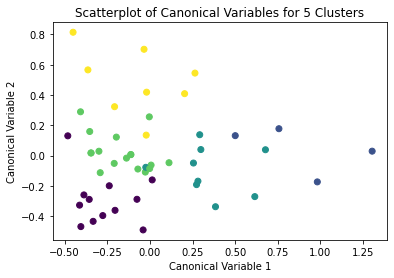

In [925]:
#Plotting the clusters for KMeans (5)

clusterNum = KMeans(n_clusters = 5)
clusterNum.fit(student_data_norm)
pred = clusterNum.predict(student_data_norm)

pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(student_data_norm)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=clusterNum.labels_,)
plt.xlabel('Canonical Variable 1')
plt.ylabel('Canonical Variable 2')
plt.title('Scatterplot of Canonical Variables for 5 Clusters')
plt.show()

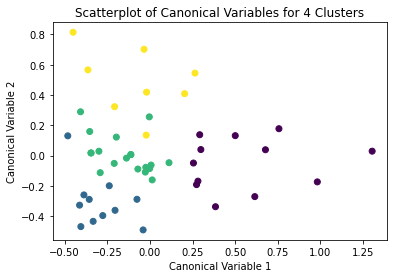

In [926]:
#Plotting the clusters for KMeans (4, most optimal for current dataset)

clusterNum = KMeans(n_clusters = 4)
clusterNum.fit(student_data_norm)
pred = clusterNum.predict(student_data_norm)

pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(student_data_norm)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=clusterNum.labels_,)
plt.xlabel('Canonical Variable 1')
plt.ylabel('Canonical Variable 2')
plt.title('Scatterplot of Canonical Variables for 4 Clusters')
plt.show()

### PART 3: Analysis of the Clusters

In [927]:
# Take the classifications made using KMeans and assign them to the correlated student and add back rating_G3
# to the inital table

int_student = pd.read_csv('216771875-216328387-215122856-T2Org.csv')
int_student.drop('G3', axis=1, inplace=True)
int_student['rating_G3'] = student_target
int_student['kmclass'] = clusterNum.labels_

int_student.to_csv('216771875-216328387-215122856-T2Class.csv')

#=========================================================================================
#=========================================================================================
# Below we are taking our modifed table and adding back rating_G3 and kmclass
# If you wish to view the whole table uncomment the line below
#=========================================================================================
#=========================================================================================
student_data_norm['rating_G3'] = student_target
student_data_norm['kmclass'] = clusterNum.labels_

#student_data_norm.to_csv('216771875-216328387-215122856-T2Class_MODIFIED.csv')
student_data_norm.head()

,traveltime,studytime,freetime,goout,Dalc,Walc,absences,rating_G3,kmclass
0,0.5,0.333333,0.50,0.75,0.00,0.00,0.24,0,3
1,0.0,0.333333,0.50,0.50,0.00,0.00,0.16,0,2
2,0.0,0.333333,0.50,0.25,0.25,0.50,0.40,1,0
3,0.0,0.666667,0.25,0.25,0.00,0.00,0.08,2,2
4,0.0,0.333333,0.50,0.25,0.00,0.25,0.16,1,2


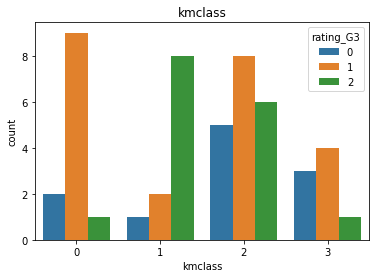

In [928]:
#Counting all instances of 0, 1 and 2 from rating_G3 in each of the (4) clusters identified (kmclass)
sns.countplot(x = 'kmclass', hue = 'rating_G3', data = student_data_norm).set(title=str('kmclass'))
plt.show()

In [929]:
#Making a new table with data classifed as 0, and describing it
student_data_A = student_data_norm[student_data_norm.kmclass==0]
student_data_A.describe()

,traveltime,studytime,freetime,goout,Dalc,Walc,absences,kmclass
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.0
mean,0.041667,0.138889,0.562500,0.625000,0.229167,0.645833,0.300000,0.0
std,0.144338,0.171643,0.284545,0.291937,0.291125,0.198240,0.239089,0.0
min,0.000000,0.000000,0.000000,0.250000,0.000000,0.250000,0.000000,0.0
25%,0.000000,0.000000,0.437500,0.437500,0.000000,0.500000,0.140000,0.0
50%,0.000000,0.000000,0.625000,0.625000,0.250000,0.750000,0.240000,0.0
75%,0.000000,0.333333,0.750000,0.812500,0.250000,0.750000,0.500000,0.0
max,0.500000,0.333333,1.000000,1.000000,1.000000,1.000000,0.640000,0.0


In [930]:
#Making a new table with data classifed as 1, and describing it
student_data_B = student_data_norm[student_data_norm.kmclass==1]
student_data_B.describe()

,traveltime,studytime,freetime,goout,Dalc,Walc,absences,kmclass
count,11.000000,11.000000,11.000000,11.000000,11.0,11.000000,11.000000,11.0
mean,0.090909,0.212121,0.818182,0.113636,0.0,0.045455,0.036364,1.0
std,0.202260,0.224733,0.196561,0.171888,0.0,0.150756,0.097085,0.0
min,0.000000,0.000000,0.500000,0.000000,0.0,0.000000,0.000000,1.0
25%,0.000000,0.000000,0.750000,0.000000,0.0,0.000000,0.000000,1.0
50%,0.000000,0.333333,0.750000,0.000000,0.0,0.000000,0.000000,1.0
75%,0.000000,0.333333,1.000000,0.250000,0.0,0.000000,0.000000,1.0
max,0.500000,0.666667,1.000000,0.500000,0.0,0.500000,0.320000,1.0


In [931]:
#Making a new table with data classifed as 2, and describing it
student_data_C = student_data_norm[student_data_norm.kmclass==2]
student_data_C.describe()

,traveltime,studytime,freetime,goout,Dalc,Walc,absences,kmclass
count,19.0,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.0
mean,0.0,0.438596,0.473684,0.394737,0.013158,0.078947,0.117895,2.0
std,0.0,0.223679,0.184367,0.173121,0.057354,0.119392,0.107888,0.0
min,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0.000000,2.0
25%,0.0,0.333333,0.250000,0.250000,0.000000,0.000000,0.080000,2.0
50%,0.0,0.333333,0.500000,0.250000,0.000000,0.000000,0.080000,2.0
75%,0.0,0.666667,0.500000,0.500000,0.000000,0.250000,0.160000,2.0
max,0.0,1.000000,0.750000,0.750000,0.250000,0.250000,0.400000,2.0


In [932]:
#Making a new table with data classifed as 3, and describing it
student_data_D = student_data_norm[student_data_norm.kmclass==3]
student_data_D.describe()

,traveltime,studytime,freetime,goout,Dalc,Walc,absences,kmclass
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.0
mean,0.625000,0.416667,0.468750,0.500000,0.031250,0.093750,0.340000,3.0
std,0.231455,0.154303,0.247758,0.188982,0.088388,0.129387,0.302372,0.0
min,0.500000,0.333333,0.000000,0.250000,0.000000,0.000000,0.080000,3.0
25%,0.500000,0.333333,0.437500,0.437500,0.000000,0.000000,0.160000,3.0
50%,0.500000,0.333333,0.500000,0.500000,0.000000,0.000000,0.240000,3.0
75%,0.625000,0.416667,0.562500,0.562500,0.000000,0.250000,0.350000,3.0
max,1.000000,0.666667,0.750000,0.750000,0.250000,0.250000,1.000000,3.0
